# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely terrible experie...
1,✅ Trip Verified | Vancouver to Delhi via Lond...
2,✅ Trip Verified | Old A320 with narrow pitch....
3,✅ Trip Verified | Another BA Shambles. Starte...
4,Not Verified | BA cancelled my flight home to...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Absolutely terrible experience with British ...
1,Vancouver to Delhi via London. We were booke...
2,Old A320 with narrow pitch. Flight perfectly...
3,Another BA Shambles. Started off well with e...
4,BA cancelled my flight home to Heathrow on D...
...,...
995,London to Las Vegas. Disappointed at BA - fli...
996,Tampa to Gatwick. I am a disabled traveller ...
997,"Heathrow to Keflavik. I had booked economy, ..."
998,London to Muscat first class. First time try...


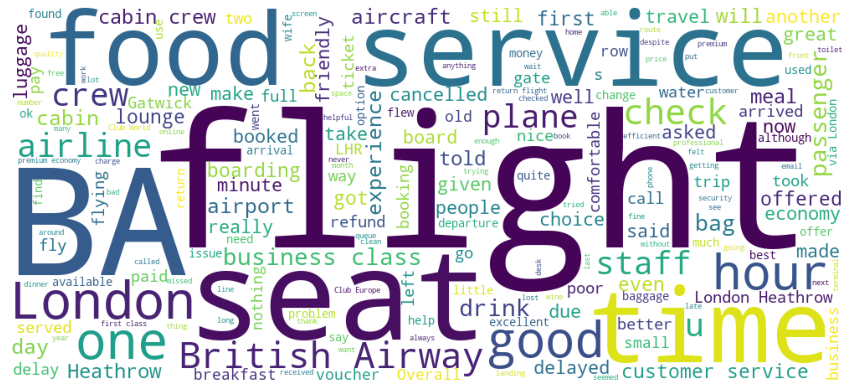

In [6]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)
wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

Good -  406
Bad -  93


<AxesSubplot:>

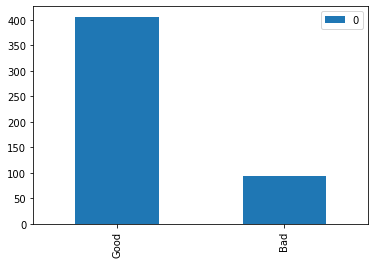

In [8]:
data_food = df[df['reviews'].str.contains('food | drink')]
food_list = data_food.reviews.tolist()

good = 0
bad = 0
for i in food_list:
    good  += i.count('good')
    good  += i.count('excellent')
    good  += i.count('better')
    bad += i.count('bad')
    bad += i.count('worse')
    bad += i.count('worst')
    
print("Good - " , good)
print("Bad - " , bad)

food_rev = np.array([good , bad])

# name the columns
columns = ['Good','Bad']

# create the data frame of dta which we want to create our barplot
df_food = pd.DataFrame(food_rev, columns)

# show the bar plot
df_food.plot.bar()

As we can see , 406 people have reviewd the food and drinks as good by terming 'good' , 'excellent' , 'better' and 93 people have reviewd food as bad by quoting 'bad' , 'worse' and 'worst'

In [10]:
data_ontime = df[df['reviews'].str.contains('late | on time | cancelled | delayed')]
ontime_list = data_ontime.reviews.tolist()

ontime = 0
late = 0
cancelled = 0
delayed = 0
for i in ontime_list:
    ontime  += i.count('on time')
    late += i.count('late')
    cancelled  += i.count('cancelled')
    delayed += i.count('delayed')
    
print("On Time - " , ontime)
print("Late - " , late)
print("Cancelled - " , cancelled)
print("Delayed - " , delayed)

On Time -  83
Late -  192
Cancelled -  124
Delayed -  151


<AxesSubplot:>

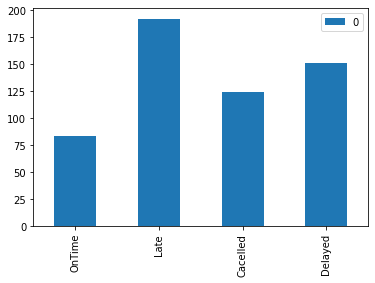

In [11]:
time_rev = np.array([ontime , late , cancelled , delayed])

# name the columns
columns = ['OnTime','Late','Cacelled' , 'Delayed']

# create the data frame of dta which we want to create our barplot
df_time = pd.DataFrame(time_rev, columns)

# show the bar plot
df_time.plot.bar()

If we consider reviews for file timings , ontime has been mentioned 84 times , late 192 times , cancelled 124 times and delayed 151 times.
It shows that flights are not on time usually